<a href="https://colab.research.google.com/github/assk0401/montcarl/blob/main/montcarl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import time
start_time = time.perf_counter() # Or

import matplotlib.pyplot as plt
from numpy import exp, log10 as log
import random
import numpy as np
import pandas as pd

def salpeter55(m):
	alpha = 2.35
	return m**-alpha

def millerscalo79(m):
	return np.where(m > 1, salpeter55(m), salpeter55(1))

def chabrier03individual(m):
	k = 0.158 * exp(-(-log(0.08))**2/(2 * 0.69**2))
	return np.where(m <= 1,\
	        0.158*(1./m) * exp(-(log(m)-log(0.08))**2/(2 * 0.69**2)),\
	        k*m**-2.3)

def chabrier03system(m):
	k = 0.086 * exp(-(-log(0.22))**2/(2 * 0.57**2))
	return np.where(m <= 1,\
	        0.086*(1./m) * exp(-(log(m)-log(0.22))**2/(2 * 0.57**2)),\
	        k*m**-2.3)

def kroupa01(m):
	return np.where(m<0.08, m**-0.3, np.where(m < 0.5, 0.08**-0.3 * (m/0.08)**-1.3, 0.08**-0.3 * (0.5/0.08)**-1.3 * (m/0.5)**-2.3))


def random_number_generator(count):
    for _ in range(count):
        yield ((random.randrange(0,1000,1)/10)+random.randrange(0,1000,1)/10000,(random.randrange(0,10000,1)/10)+random.randrange(0,1000,1)/10000)
def random_number_generator(count):
    for _ in range(count):
        yield (np.log10(random.random()*1e2),np.log10(random.random()*1e3))

#def random_number_generator(count):
#    for _ in range(count):
#        yield np.random.rand(100,2)


n=10000
data=np.empty((n,2))
# Iterate through random numbers without storing them all
i=0
for num in random_number_generator(n):
    #plt.plot(num,num,'.r')
    data[i]=num
    i+=1
    pass


end_time = time.perf_counter() # Or time.time()

elapsed_time = end_time - start_time
print(f"Execution time: {elapsed_time:.4f} seconds")


Execution time: 0.0551 seconds


In [18]:
np.random.rand(10,2)

array([[0.22397833, 0.50722273],
       [0.52771403, 0.4091511 ],
       [0.73780377, 0.57413341],
       [0.8530439 , 0.75787395],
       [0.86970478, 0.67219478],
       [0.97681535, 0.09512183],
       [0.22399337, 0.18366541],
       [0.5078992 , 0.75747352],
       [0.97430301, 0.35229243],
       [0.40253418, 0.36972164]])

In [59]:
data[0]

array([ 116.72838319, 3757.96786764])

Execution time: 7.3126 seconds


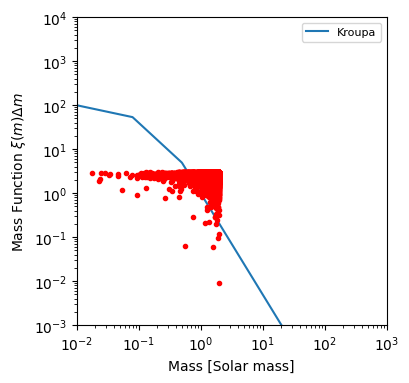

In [28]:
start_time = time.perf_counter() # Or
plt.figure(figsize=(4,4))
m = np.logspace(-2, 2, 400)
for label, imf in zip('Kroupa'.split(),\
        [kroupa01]):
	plt.plot(m, imf(m)/imf(1), label=label)

plt.gca().set_yscale('log')
plt.gca().set_xscale('log')
plt.xlim(1e-2, 1000)
plt.ylim(1e-3, 1e4)
plt.legend(loc='best', prop=dict(size=8))
plt.xlabel('Mass [Solar mass]')
plt.ylabel(r'Mass Function $\xi(m)\Delta m$')
plt.savefig('imf.pdf', bbox_inches='tight')
plt.savefig('imf.svg', bbox_inches='tight')
plt.savefig('imf.png', bbox_inches='tight')

for i in range(n):
  plt.plot(data[i][0],data[i][1],'.r')
#for i in range(n):
#  plt.plot(random_number_generator(100),'.r')
#plt.plot(np.random.randn(10000,2),'.r')
end_time = time.perf_counter() # Or time.time()

elapsed_time = end_time - start_time
print(f"Execution time: {elapsed_time:.4f} seconds")

In [6]:
data[0]

array([ 74.44757731, 489.12033191])